 #                                                              A comparative study of machine learning techniques for predicting Employee Attrition 




# Problem Statements:

In the past few months, an organization has experienced a significant increase in employee attrition.They  want to understand the main factors which prompt employees to leave the organization.The objective is to improve these factors to prevent loss of good people

The company appointed you as a data scientist and requires you to build a model which can accurately predict which employees are likely to leave the organization in the near future.This prediction can help the HR department take proactive measures to retain valuable employees and reduce the cost and impact of employee turnover on the organization.

.

 # Dataset we will need:
1)Employee Personal Information 
2)Employee details
3)Attrition history.

# Import Libraries

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#hr=pd.read_csv("HR-Employee-Attrition.csv")

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Step 1: Importing  Data

Notes:
1. If data is coming from different source then merge all the data in a single data frame by using pd.merge. Here the data is already merged  .So reading it in a data frame

In [7]:
hr = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/HR-Employee-Attrition.csv')

In [46]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Step 2 : Inspecting Dataframe

In [8]:
# Let's check the dimension of the dataframe
hr.shape

(1470, 35)

In [9]:
# Let's look at the statistical aspect of the dataframe.
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
# Let's see the type of each column
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [11]:
# Let's see the missing value count in the dataset
hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

So we dont have any null value

In [12]:
hr['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# Step 3: Data Preparation

In [13]:
# Check duplicate rows in dataframe

hr[hr.duplicated(keep=False)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [14]:
# Get a Series of count of unique values in each column
hr.nunique()


Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [15]:
# Drop the columns having only one value
hr=hr.drop(["EmployeeCount","Over18","StandardHours"],1)

In [16]:
# Check the columns having two unique values.

hr['Attrition'].unique() # This is our Target variable.

array(['Yes', 'No'], dtype=object)

In [17]:
hr['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
hr['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
hr['PerformanceRating'].unique()

array([3, 4])

In [20]:
#There are some columns having values yes and no.We wil map those values with 1 and 0.

#list of variables to map

var=['Attrition','OverTime']
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the variable list
hr[var] = hr[var].apply(binary_map)

In [21]:
# Map columns 'Gender'  with 1 and 0.

d={'Male':1,'Female':0}
hr['Gender']=hr['Gender'].apply(lambda x:d[x])

In [22]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   int64 
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [23]:
#catagorical variable:

cat = hr.select_dtypes(include=['object'])
cat.head()

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married


In [24]:
##Checking columns having unique values

In [25]:
hr['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [26]:
hr['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [27]:
hr['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [28]:
hr['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [29]:
hr['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [30]:
# num variable:

num = hr.select_dtypes(include=['int64'])
num.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,2,0,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,0,279,8,1,2,3,1,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,4,1,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,5,4,0,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,0,591,2,1,7,1,1,40,3,...,3,4,1,6,3,3,2,2,2,2


In [31]:
num.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

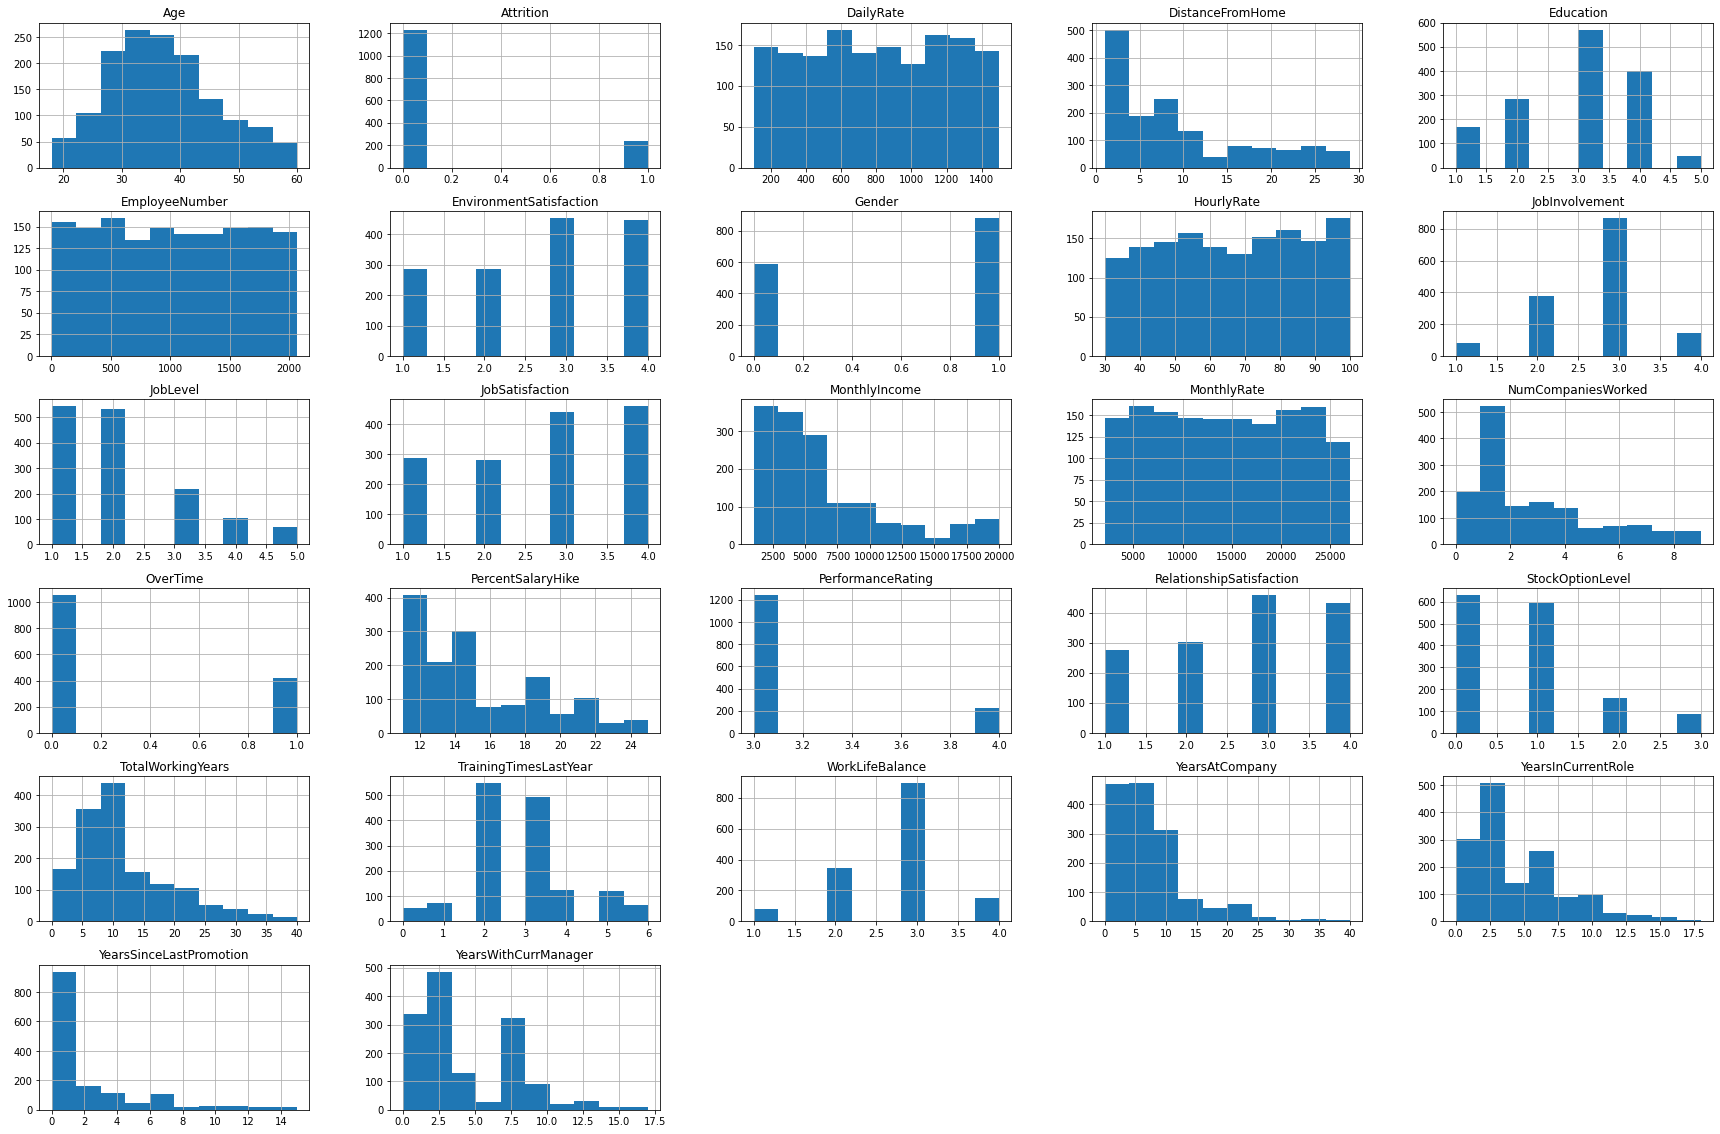

In [32]:
##Visualise numerical variables distribution
num.hist(figsize=(30,20));

In [33]:
hr['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60])

In [34]:
## Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num.describe(percentiles=[.25, .5, .75, .90, .95, .99])



,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1024.865306,2.721769,0.600000,65.891156,2.729932,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,602.024335,1.093082,0.490065,20.329428,0.711561,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,491.250000,2.000000,0.000000,48.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,1.000000,66.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,1.000000,83.750000,3.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
90%,50.000000,1.000000,1356.000000,23.000000,4.000000,1857.100000,4.000000,1.000000,94.000000,3.000000,...,4.000000,4.000000,2.000000,23.000000,5.000000,4.000000,15.000000,9.000000,7.000000,9.000000
95%,54.000000,1.000000,1424.100000,26.000000,4.000000,1967.550000,4.000000,1.000000,97.000000,4.000000,...,4.000000,4.000000,3.000000,28.000000,5.000000,4.000000,20.000000,11.000000,9.000000,10.000000
99%,58.310000,1.000000,1485.000000,29.000000,5.000000,2046.620000,4.000000,1.000000,100.000000,4.000000,...,4.000000,4.000000,3.000000,35.000000,6.000000,4.000000,31.000000,15.000000,14.000000,14.000000


In [35]:
# Check co-relation
corr=num.corr()

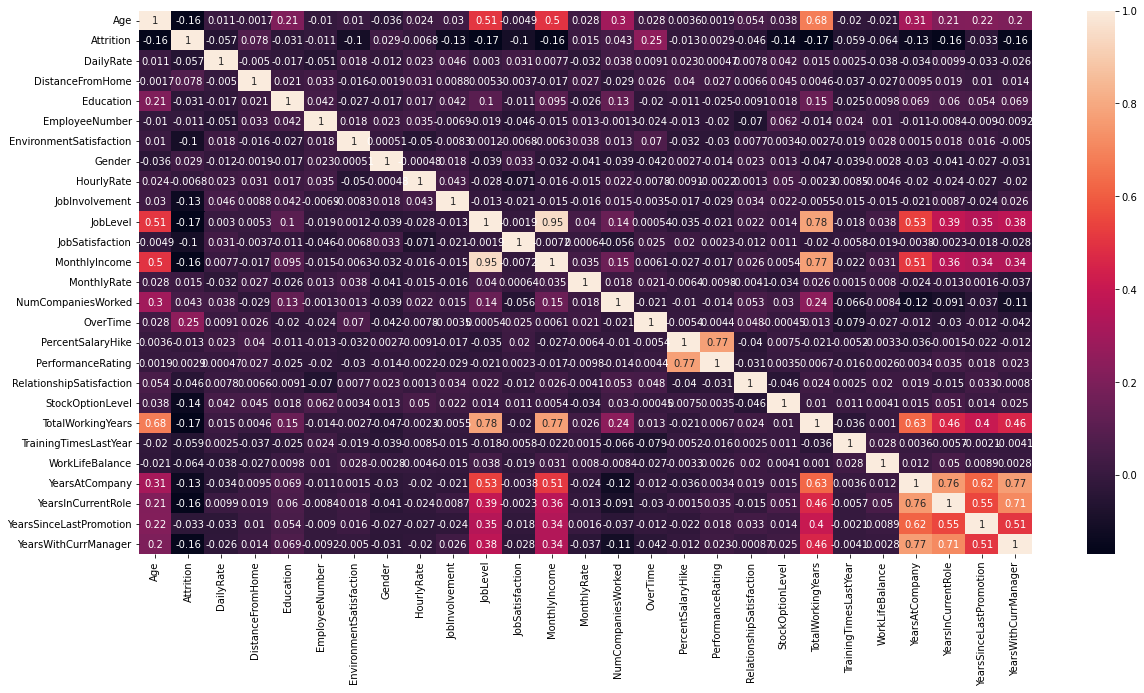

In [36]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(corr,annot = True)
plt.show()

In [37]:
# High Correlated Features (We are considering greter than 0.6))

# TotalWorkingYears vs  Age: 0.68
# TotalWorkingYears vs Joblevel: 0.78
# TotalWorkingYears vs MonthlyIncome: 0.77
# TotalWorkingYears vs YearsAtCompany:0.63

# YearsAtCompany vs yearsInCurrentRole:0.76
# YearsAtCompany vs YearsWithCurrentManager:0.77
# YearsAtCompany vs YearsSinceLastPromotion:0.62

# YearsWithCurentmanger vs yearsInCurrentRole:0.71
# PercentSalaryhike vs PerformanceRating :0.77

# features that are too correlated, we have to remove one, as this may worsen the model

# lets check corelation with attrition (dependent variable)
# Attrition vs TotalWorkingYears :-0.17
# Attrition vs  Age: -0.16
# Attrition vs  MonthlyIncome:-0.16
# Attrition vs YearsAtCompany:-0.13
# Attrition vs yearsInCurrentRole:-0.16
# Atrition vs YearsWithCurrentManager:-0.16
# Attrition vs yearsInCurrentRole:-0.16

In [38]:
##Droping TotalWorkingYears,years at company,Yearsin currentRole.
hr=hr.drop(['TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','PerformanceRating','JobLevel'],1) # mention advantage and disadvantage


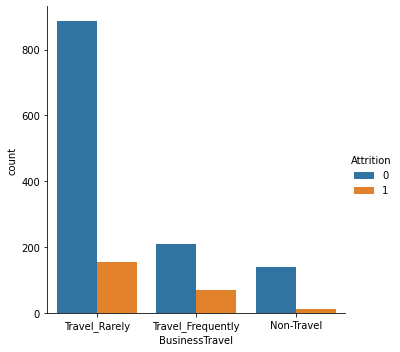

In [39]:
#BusinessTravel

sns.factorplot(x='BusinessTravel', data=hr, hue='Attrition', kind='count')

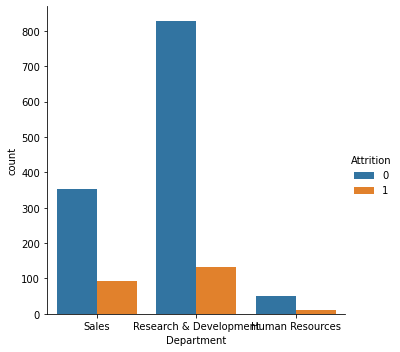

In [40]:
#Department
sns.factorplot(x='Department', data=hr, hue='Attrition', kind='count')


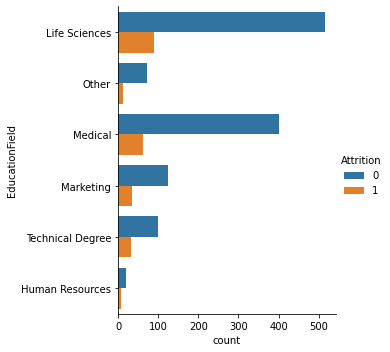

In [41]:
#EducationField
sns.factorplot(y='EducationField', data=hr, hue='Attrition', kind='count')

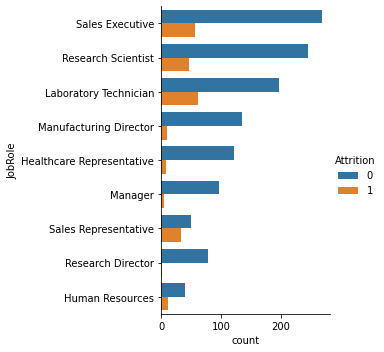

In [42]:
#JobRole

sns.factorplot(y='JobRole', data=hr, hue='Attrition', kind='count')
#MaritalStatus

# Dummy creation



Reference
https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [43]:
#creating dummy for categorigal variable

dummy=pd.get_dummies(cat,drop_first=True)

In [44]:
dummy.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [45]:
hr.shape

(1470, 27)

In [46]:
cat.columns

Index(['BusinessTravel', 'Department', 'EducationField', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [47]:
#Adding with master data frame
hr=pd.concat([hr,dummy],axis=1)

In [48]:
hr.shape

(1470, 46)

In [49]:
#Dropping duplicate columns
hr=hr.drop(list(cat.columns),axis=1)

In [50]:
hr.shape

(1470, 41)

In [51]:
hr.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,2,0,94,3,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,2,3,1,61,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,4,1,92,2,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,5,4,0,56,3,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,7,1,1,40,3,...,0,1,0,0,0,0,0,0,1,0


In [52]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeNumber                     1470 non-null   int64
 6   EnvironmentSatisfaction            1470 non-null   int64
 7   Gender                             1470 non-null   int64
 8   HourlyRate                         1470 non-null   int64
 9   JobInvolvement                     1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

In [53]:
Attrition = (sum(hr['Attrition'])/len(hr['Attrition'].index))*100
Attrition

16.122448979591837

In [54]:
corr=hr.corr()


In [55]:
high_corr=(corr>0.6)

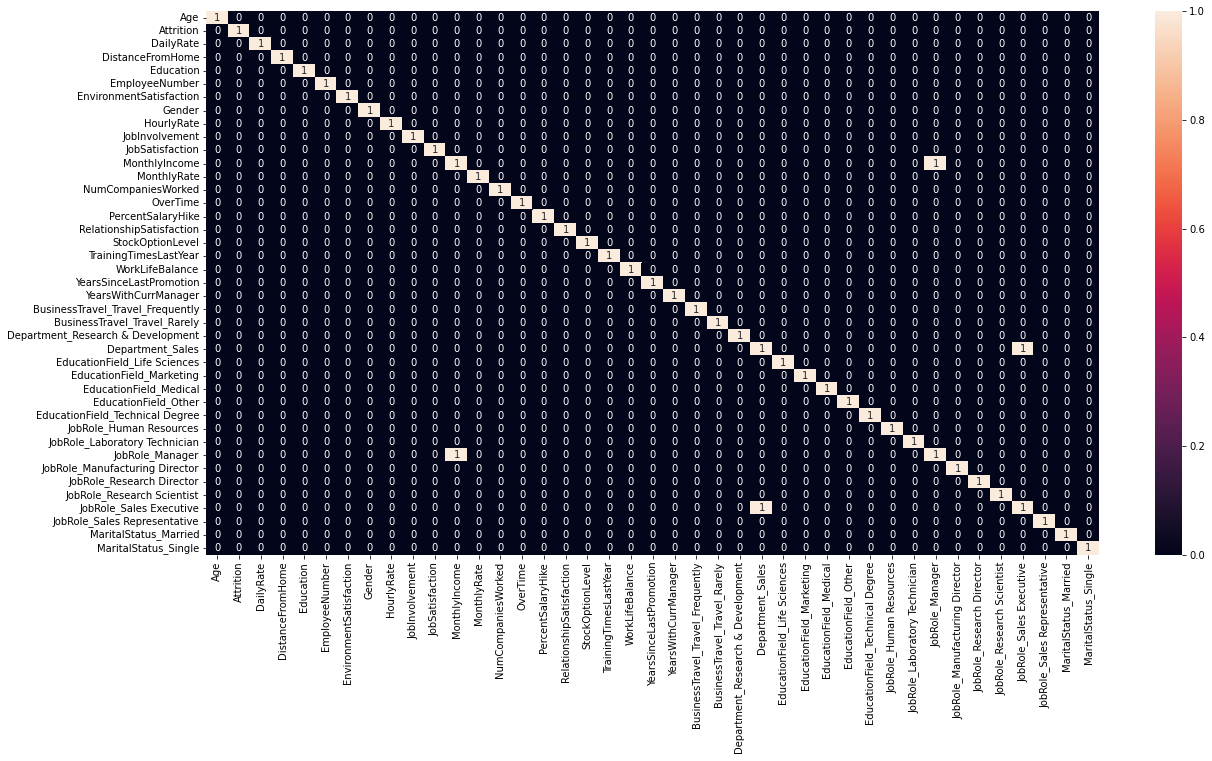

In [56]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(high_corr,annot = True)
plt.show()

In [57]:
# monthlyincome vs joblevel,
# monthlyincome vs jobrole_manager
# Department_sales Jobrole_Sales Executive

In [58]:
hr=hr.drop(['JobRole_Manager','JobRole_Sales Executive'],1)

# Step 4: Test Train Split

In [59]:
#Test and Train Split
from sklearn.model_selection import train_test_split

In [60]:
# Putting feature variable to X
X=hr.drop(['EmployeeNumber','Attrition'],1)  # X will be everything except Employeenumber and Attrition
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,...,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1102,1,2,2,0,94,3,4,5993,...,0,0,0,0,0,0,0,0,0,1
1,49,279,8,1,3,1,61,2,2,5130,...,0,0,0,0,0,0,1,0,1,0
2,37,1373,2,2,4,1,92,2,3,2090,...,1,0,0,1,0,0,0,0,0,1
3,33,1392,3,4,4,0,56,3,3,2909,...,0,0,0,0,0,0,1,0,1,0
4,27,591,2,1,1,1,40,3,2,3468,...,0,0,0,1,0,0,0,0,1,0


In [61]:
##Putting response variable to Y
y=hr['Attrition']

y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [62]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

# Step 5: Feature Scaling

Scaling basically reduces the values in a column to within a certain range.In this case we have converted the values to the Z-scores.

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples  and s is the standard deviation of the training samples 

Reference:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#:~:text=preprocessing%20import%20StandardScaler%20%3E%3E%3E%20data,transform(data))%20%5B%5B%2D1.



https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

In [63]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()
var=['Age', 'DailyRate', 'DistanceFromHome', 'Education',
        'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
        'RelationshipSatisfaction', 'StockOptionLevel',
        'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsSinceLastPromotion',
       'YearsWithCurrManager']
X_train[var]=scaler.fit_transform(X_train[var])

# Step 6 : Model Building

In [107]:
import statsmodels.api as sm

In [108]:
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [109]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                            GLM   Df Residuals:                      991
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -288.90
Date:                Wed, 22 Feb 2023   Deviance:                       577.80
Time:                        20:12:05   Pearson chi2:                 4.05e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               -22.7229   1.63e+04     -0.001      0.999   -3.21e+04     3.2e+04
Age                                  -0.3792      0.134     -2.830      0.005      -0.642      -0.117
DailyRate                            -0.1582      0.110     -1.436      0.151      -0.374       0.058
DistanceFromHome                      0.4063      0.109      3.730      0.000       0.193       0.620
Education                             0.0102      0.109      0.093      0.926      -0.204       0.225
EnvironmentSatisfaction              -0.4156      0.111     -3.737      0.000      -0.633      -0.198
Gender                                0.2174      0.112      1.940      0.052      -0.002       0.437
HourlyRate                           -0.0504      0.112     -0.449      0.653      -0.270       0.170
JobInvolvement                       -0.4615      0.109     -4.231      0.000      -0.675      -0.248
JobSatisfaction                      -0.3786      0.109     -3.464      0.001      -0.593      -0.164
MonthlyIncome                        -0.6012      0.258     -2.326      0.020      -1.108      -0.095
MonthlyRate                          -0.0306      0.109     -0.279      0.780      -0.245       0.184
NumCompaniesWorked                    0.5449      0.115      4.743      0.000       0.320       0.770
OverTime                              0.9484      0.108      8.798      0.000       0.737       1.160
PercentSalaryHike                     0.0068      0.111      0.061      0.951      -0.211       0.225
RelationshipSatisfaction             -0.2754      0.111     -2.492      0.013      -0.492      -0.059
StockOptionLevel                     -0.2659      0.168     -1.578      0.115      -0.596       0.064
TrainingTimesLastYear                -0.1692      0.117     -1.449      0.147      -0.398       0.060
WorkLifeBalance                      -0.3438      0.109     -3.157      0.002      -0.557      -0.130
YearsSinceLastPromotion               0.8205      0.158      5.196      0.000       0.511       1.130
YearsWithCurrManager                 -0.7555      0.167     -4.519      0.000      -1.083      -0.428
BusinessTravel_Travel_Frequently      1.7185      0.478      3.592      0.000       0.781       2.656
BusinessTravel_Travel_Rarely          0.6964      0.440      1.584      0.113      -0.165       1.558
Department_Research & Development    18.2800   1.63e+04      0.001      0.999    -3.2e+04    3.21e+04
Department_Sales                     19.5068   1.63e+04      0.001      0.999    -3.2e+04    3.21e+04
EducationField_Life Sciences         -0.5888      1.002     -0.588      0.557      -2.553       1.375
EducationField_Marketing             -0.1664      1.065     -0.156      0.876      -2.254       1.921
EducationField_Medical 


P values and coefficients in regression analysis work together to tell you which relationships in your model are statistically significant and the nature of those relationships. From above statistics we can see some variable has very high P-value.We have to remove those values from train model.


What does the coefficient mean? The sign of a linear regression coefficient tells you whether there is a positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.


In [113]:
#X_train.shape

# STEP 7 : Feature Selection Using RFE


Recursive feature elimination is a recursive optimization method which select features recursivly by taking smaller subset of features .Then an estimator is trained with each set of features. Then by checking feature_importance/coeficient value it identifies important features.
For more details,check the below link

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE

In [110]:
lm = LogisticRegression(class_weight='balanced')

Stats model doesn't work with RFE so to enable this we are importing from ScikitLearn.

In [111]:
#feature Selection with RFE
from sklearn.feature_selection import RFE
rfe = RFE(lm,n_features_to_select=20)            
rfe= rfe.fit(X_train, y_train)


In [112]:
rfe.support_

array([False, False, False, False,  True, False, False,  True, False,
        True, False, False,  True, False, False,  True, False, False,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True, False, False,  True,  True,  True,
        True])

In [113]:
# tuples of (feature name, whether selected, ranking)
#note that the 'rank' is > 1 for non-selected features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('Age', False, 7),
 ('DailyRate', False, 11),
 ('DistanceFromHome', False, 4),
 ('Education', False, 18),
 ('EnvironmentSatisfaction', True, 1),
 ('Gender', False, 9),
 ('HourlyRate', False, 15),
 ('JobInvolvement', True, 1),
 ('JobSatisfaction', False, 5),
 ('MonthlyIncome', True, 1),
 ('MonthlyRate', False, 16),
 ('NumCompaniesWorked', False, 2),
 ('OverTime', True, 1),
 ('PercentSalaryHike', False, 14),
 ('RelationshipSatisfaction', False, 10),
 ('StockOptionLevel', True, 1),
 ('TrainingTimesLastYear', False, 13),
 ('WorkLifeBalance', False, 8),
 ('YearsSinceLastPromotion', True, 1),
 ('YearsWithCurrManager', True, 1),
 ('BusinessTravel_Travel_Frequently', True, 1),
 ('BusinessTravel_Travel_Rarely', True, 1),
 ('Department_Research & Development', True, 1),
 ('Department_Sales', True, 1),
 ('EducationField_Life Sciences', True, 1),
 ('EducationField_Marketing', False, 17),
 ('EducationField_Medical', True, 1),
 ('EducationField_Other', True, 1),
 ('EducationField_Technical Degree',

In [114]:

print ('coefficients',rfe.estimator_.coef_)

coefficients [[-0.4177694  -0.40295271 -0.56647977  0.77713684 -0.33227912  0.76233485
  -0.73704942  1.12967808  0.42562557 -0.33075155  0.54037306 -0.67147747
  -0.70466269 -0.49718703  0.50928491  1.38597348  0.571731    0.51396903
   0.32996634  0.70532112]]


In [115]:
col = X_train.columns[rfe.support_]
col

Index(['EnvironmentSatisfaction', 'JobInvolvement', 'MonthlyIncome',
       'OverTime', 'StockOptionLevel', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Medical', 'EducationField_Other',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Research Scientist', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

In [116]:
# Columns which have been excluded by RFE.

X_train.columns[~rfe.support_]

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'Gender',
       'HourlyRate', 'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'EducationField_Marketing',
       'EducationField_Technical Degree', 'JobRole_Manufacturing Director',
       'JobRole_Research Director'],
      dtype='object')

**Assesing model with StatsModels**

In [117]:
X_train_sm=sm.add_constant (X_train[col])

In [118]:
X_train_sm.columns

Index(['const', 'EnvironmentSatisfaction', 'JobInvolvement', 'MonthlyIncome',
       'OverTime', 'StockOptionLevel', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Medical', 'EducationField_Other',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Research Scientist', 'JobRole_Sales Representative',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

In [119]:
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1029
Model:                            GLM   Df Residuals:                     1008
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -324.16
Date:                Wed, 22 Feb 2023   Deviance:                       648.32
Time:                        20:12:54   Pearson chi2:                 1.29e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               -22.3608   1.68e+04     -0.001      0.999   -3.29e+04    3.28e+04
EnvironmentSatisfaction              -0.3984      0.104     -3.833      0.000      -0.602      -0.195
JobInvolvement                       -0.3916      0.101     -3.878      0.000      -0.589      -0.194
MonthlyIncome                        -0.5776      0.216     -2.678      0.007      -1.000      -0.155
OverTime                              0.7914      0.096      8.232      0.000       0.603       0.980
StockOptionLevel                     -0.2614      0.155     -1.687      0.092      -0.565       0.042
YearsSinceLastPromotion               0.6681      0.137      4.873      0.000       0.399       0.937
YearsWithCurrManager                 -0.7516      0.150     -4.996      0.000      -1.046      -0.457
BusinessTravel_Travel_Frequently      1.3685      0.430      3.184      0.001       0.526       2.211
BusinessTravel_Travel_Rarely          0.5155      0.401      1.285      0.199      -0.271       1.302
Department_Research & Development    18.6474   1.68e+04      0.001      0.999   -3.28e+04    3.29e+04
Department_Sales                     19.7617   1.68e+04      0.001      0.999   -3.28e+04    3.29e+04
EducationField_Life Sciences         -0.6258      0.272     -2.299      0.022      -1.159      -0.092
EducationField_Medical               -0.7857      0.293     -2.682      0.007      -1.360      -0.212
EducationField_Other                 -0.6881      0.528     -1.304      0.192      -1.723       0.346
JobRole_Human Resources              19.8464   1.68e+04      0.001      0.999   -3.28e+04    3.29e+04
JobRole_Laboratory Technician         1.5704      0.435      3.612      0.000       0.718       2.422
JobRole_Research Scientist            0.7253      0.442      1.642      0.101      -0.141       1.591
JobRole_Sales Representative          0.4503      0.431      1.044      0.297      -0.395       1.296
MaritalStatus_Married                 0.1678      0.304      0.551      0.581      -0.429       0.765
MaritalStatus_Single                  0.7935      0.392      2.024      0.043       0.025       1.562
=====================================================================================================
"""

In [120]:
# predict 
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

178     0.165796
971     0.022852
1172    0.101554
667     0.774060
399     0.171836
634     0.217952
266     0.030807
210     0.084191
318     0.413444
239     0.628130
dtype: float64

Creating a dataframe with the actual attrition flag and predicted probabilities.

In [121]:

y_train_pred_final = pd.DataFrame({'Attrition':y_train.values, 'Attrition_Prob':y_train_pred})
y_train_pred_final['EmployeeNumber'] = y_train.index
y_train_pred_final.head()

,Attrition,Attrition_Prob,EmployeeNumber
178,0,0.165796,178
971,0,0.022852,971
1172,0,0.101554,1172
667,1,0.774060,667
399,0,0.171836,399


**Creating new columns predicted with 1 if Attrition probability is greater than 0.5 else 0**

In [122]:
y_train_pred_final['predicted'] = y_train_pred_final.Attrition_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Attrition,Attrition_Prob,EmployeeNumber,predicted
178,0,0.165796,178,0
971,0,0.022852,971,0
1172,0,0.101554,1172,0
667,1,0.774060,667,1
399,0,0.171836,399,0


In [123]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Attrition, y_train_pred_final.predicted )
print(confusion)

[[835  27]
 [102  65]]


In [124]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Attrition, y_train_pred_final.predicted))

0.8746355685131195
